Figure out which bricks are within the GAMA photometry+spectroscopy footprint

In [39]:
import sys
import subprocess
import numpy as np 

# -- local -- 
fbgs_path = os.path.abspath(os.path.join('..'))
if fbgs_path not in sys.path: sys.path.append(fbgs_path)
from feasibgs import util as UT
from feasibgs import catalogs as Cat
from ChangTools.fitstables import mrdfits

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

Read in legacy-survey brick data

In [3]:
legacy = mrdfits(UT.dat_dir()+'survey-bricks-dr5.fits.gz')

In [4]:
print 'colums in survey-bricks-dr5.fits.gz'
print sorted(legacy.__dict__.keys())
print '>>>> ', len(legacy.ra)

colums in survey-bricks-dr5.fits.gz
['brickname', 'dec', 'ebv', 'ext_g', 'ext_r', 'ext_w1', 'ext_w2', 'ext_w3', 'ext_w4', 'ext_z', 'galdepth_g', 'galdepth_r', 'galdepth_z', 'ncomp', 'ndev', 'nexp', 'nexp_g', 'nexp_r', 'nexp_z', 'nexphist_g', 'nexphist_r', 'nexphist_z', 'nobjs', 'npsf', 'nrex', 'nsimp', 'psfdepth_g', 'psfdepth_r', 'psfdepth_z', 'psfsize_g', 'psfsize_r', 'psfsize_z', 'ra', 'trans_g', 'trans_r', 'trans_wise', 'trans_z', 'wise_nobs']
>>>>  176811


Read in GAMA survey photo+spec data

In [5]:
gama = Cat.GAMA()
gama_data = gama.Read()

Compare the footprints

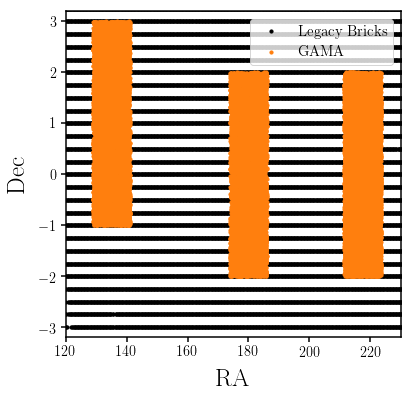

In [16]:
fig = plt.figure(figsize=(6,6))
bkgd = fig.add_subplot(111, frameon=False)
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
bkgd.set_xlabel('RA', labelpad=10, fontsize=25)
bkgd.set_ylabel('Dec', labelpad=10, fontsize=25)

sub = fig.add_subplot(111)
sub.scatter(legacy.ra, legacy.dec, c='K', s=10, label='Legacy Bricks')
sub.scatter(gama_data['photo']['ra'], gama_data['photo']['dec'], c='C1', s=10, label='GAMA')
sub.set_xlim([120., 230])
sub.set_ylim([-3.2, 3.2])
sub.legend(loc='upper right', frameon=True, prop={'size':15})

There are three chunks of GAMA data, from left to right ...

In [11]:
chunk1 = ((gama_data['photo']['ra'] < 150.) & (gama_data['photo']['ra'] > 120.))
chunk2 = ((gama_data['photo']['ra'] < 200.) & (gama_data['photo']['ra'] > 160.))
chunk3 = ((gama_data['photo']['ra'] < 230.) & (gama_data['photo']['ra'] > 200.))

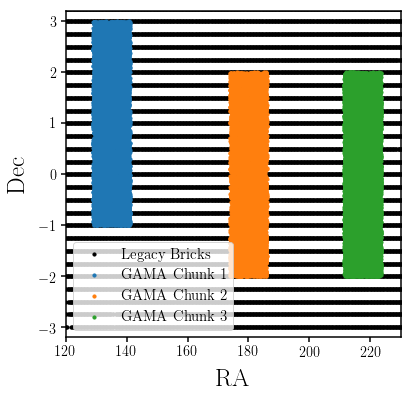

In [15]:
fig = plt.figure(figsize=(6,6))
bkgd = fig.add_subplot(111, frameon=False)
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
bkgd.set_xlabel('RA', labelpad=10, fontsize=25)
bkgd.set_ylabel('Dec', labelpad=10, fontsize=25)

sub = fig.add_subplot(111)
sub.scatter(legacy.ra, legacy.dec, c='K', s=10, label='Legacy Bricks')
sub.scatter(gama_data['photo']['ra'][chunk1], gama_data['photo']['dec'][chunk1], c='C0', s=10, label='GAMA Chunk 1')
sub.scatter(gama_data['photo']['ra'][chunk2], gama_data['photo']['dec'][chunk2], c='C1', s=10, label='GAMA Chunk 2')
sub.scatter(gama_data['photo']['ra'][chunk3], gama_data['photo']['dec'][chunk3], c='C2', s=10, label='GAMA Chunk 3')
sub.set_xlim([120., 230])
sub.set_ylim([-3.2, 3.2])
sub.legend(loc='lower left', frameon=True, prop={'size':15})

In [17]:
leg_chunk1 = ((legacy.ra < gama_data['photo']['ra'][chunk1].max()) &
              (legacy.ra > gama_data['photo']['ra'][chunk1].min()) & 
              (legacy.dec < gama_data['photo']['dec'][chunk1].max()) & 
              (legacy.dec > gama_data['photo']['dec'][chunk1].min())) 
leg_chunk2 = ((legacy.ra < gama_data['photo']['ra'][chunk2].max()) &
              (legacy.ra > gama_data['photo']['ra'][chunk2].min()) & 
              (legacy.dec < gama_data['photo']['dec'][chunk2].max()) & 
              (legacy.dec > gama_data['photo']['dec'][chunk2].min())) 
leg_chunk3 = ((legacy.ra < gama_data['photo']['ra'][chunk3].max()) &
              (legacy.ra > gama_data['photo']['ra'][chunk3].min()) & 
              (legacy.dec < gama_data['photo']['dec'][chunk3].max()) & 
              (legacy.dec > gama_data['photo']['dec'][chunk3].min())) 

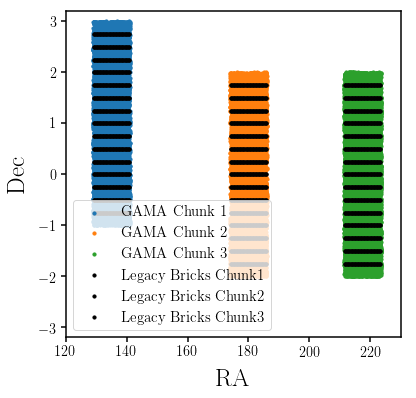

In [18]:
fig = plt.figure(figsize=(6,6))
bkgd = fig.add_subplot(111, frameon=False)
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
bkgd.set_xlabel('RA', labelpad=10, fontsize=25)
bkgd.set_ylabel('Dec', labelpad=10, fontsize=25)

sub = fig.add_subplot(111)
sub.scatter(gama_data['photo']['ra'][chunk1], gama_data['photo']['dec'][chunk1], c='C0', s=10, label='GAMA Chunk 1')
sub.scatter(gama_data['photo']['ra'][chunk2], gama_data['photo']['dec'][chunk2], c='C1', s=10, label='GAMA Chunk 2')
sub.scatter(gama_data['photo']['ra'][chunk3], gama_data['photo']['dec'][chunk3], c='C2', s=10, label='GAMA Chunk 3')
sub.scatter(legacy.ra[leg_chunk1], legacy.dec[leg_chunk1], c='K', s=10, label='Legacy Bricks Chunk1')
sub.scatter(legacy.ra[leg_chunk2], legacy.dec[leg_chunk2], c='K', s=10, label='Legacy Bricks Chunk2')
sub.scatter(legacy.ra[leg_chunk3], legacy.dec[leg_chunk3], c='K', s=10, label='Legacy Bricks Chunk3')
sub.set_xlim([120., 230])
sub.set_ylim([-3.2, 3.2])
sub.legend(loc='lower left', frameon=True, prop={'size':15})

In [20]:
legacy_gama_bricknames = np.concatenate([
    legacy.brickname[leg_chunk1], 
    legacy.brickname[leg_chunk2], 
    legacy.brickname[leg_chunk3]])

In [21]:
legacy_gama_bricknames[:10]

array(['1291m002', '1291m005', '1291m007', '1291p000', '1291p002',
       '1291p005', '1291p007', '1291p010', '1291p012', '1291p015'],
      dtype='|S8')

In [23]:
legacy_gama_ra = np.zeros(len(legacy_gama_bricknames))
legacy_gama_dec = np.zeros(len(legacy_gama_bricknames))

for i_b, bname in enumerate(legacy_gama_bricknames): 
    if 'p' in bname: 
        legacy_gama_ra[i_b] = float(bname.split('p')[0])/10.
        legacy_gama_dec[i_b] = float(bname.split('p')[-1])/10.
    elif 'm' in bname: 
        legacy_gama_ra[i_b] = float(bname.split('m')[0])/10.
        legacy_gama_dec[i_b] = -1.*float(bname.split('m')[-1])/10.        
    else: 
        raise ValueError

In [25]:
print legacy_gama_ra, legacy_gama_dec

[ 129.1  129.1  129.1 ...,  223.3  223.3  223.3] [-0.2 -0.5 -0.7 ...,  1.2  1.5  1.7]


In [34]:
legacy_gama_sweep = []

for i_b in range(len(legacy_gama_ra)):
    ra_min = str(int(legacy_gama_ra[i_b]/10)*10)
    ra_max = str(int(legacy_gama_ra[i_b]/10 + 1)*10)
    dec_min = int(np.floor(legacy_gama_dec[i_b]/0.5)*5)
    if dec_min < 0: 
        dec_min = ''.join(['m', str(np.abs(dec_min)).zfill(3)])
    else: 
        dec_min = ''.join(['p', str(dec_min).zfill(3)])
    dec_max = int(np.floor(legacy_gama_dec[i_b]/0.5+1)*5)
    if dec_max < 0: 
        dec_max = ''.join(['m', str(np.abs(dec_max)).zfill(3)])
    else: 
        dec_max = ''.join(['p', str(dec_max).zfill(3)])
    legacy_gama_sweep.append(''.join(['sweep-', ra_min, dec_min, '-', ra_max, dec_max, '.fits']))

In [35]:
sweep_file_list = np.unique(legacy_gama_sweep)

In [41]:
print sweep_file_list[::10]

['sweep-120m005-130p000.fits' 'sweep-130p000-140p005.fits'
 'sweep-140p010-150p015.fits' 'sweep-170p010-180p015.fits'
 'sweep-210m005-220p000.fits' 'sweep-220m015-230m010.fits']


Now lets download each of the sweep files that overlap with GAMA DR2

In [ ]:
for f in sweep_file_list: 
    flink = 'http://portal.nersc.gov/project/cosmo/data/legacysurvey/dr5/sweep/5.0/'+f
    cmd = ''.join(['curl ', flink, ' -o ', '/Users/chang/projects/feasiBGS/dat/legacy/sweep/'+f]) 
    subprocess.call(cmd.split())

also save file list 

In [ ]:
np.savetxt(sweep_file_list, ''.join(['/Users/chang/projects/feasiBGS/dat/legacy/sweep/sweep_list.dat']), 
           dtype='S')